In [7]:
from numpy import exp, meshgrid, sum, linspace, divide
from numpy.random import rand, randint
import matplotlib.pyplot as plt

In [8]:
class Ising():

    # initialization
    def __init__(self, temperature, lattice, iterations, plots=True):
        self.temperature = temperature
        self.lattice = lattice
        self.iterations = iterations
        self.plots = plots

    # energy of the crystal
    def E(self, crystal, lattice):
        energy = 0
        for i in range(len(crystal)):
            for j in range(len(crystal)):
                S = crystal[i, j]
                nb = crystal[(i + 1) % lattice, j] + crystal[i, (j + 1) % lattice] + \
                    crystal[(i - 1) % lattice, j] + \
                    crystal[i, (j - 1) % lattice]
                energy += -nb * S
        return energy / 4.

    # magnetization of crystal
    def M(self, crystal):
        mag = sum(crystal)
        return mag

    # monte carlo steps
    def mcStep(self, crystal, lattice, beta):
        for i in range(lattice):
            for j in range(lattice):
                a = randint(0, lattice)
                b = randint(0, lattice)
                s = crystal[a, b]
                nb = crystal[(a + 1) % lattice, b] + crystal[a, (b + 1) % lattice] + \
                    crystal[(a - 1) % lattice, b] + \
                    crystal[a, (b - 1) % lattice]
                metric = 2 * s * nb
                if metric < 0:
                    s *= -1
                elif rand() < exp(-metric * beta):
                    s *= -1
                crystal[a, b] = s
        return crystal

    # simulate the crystal
    def simulate(self):
        E = 0
        M = 0
        crystal = 2 * randint(2, size=(self.lattice, self.lattice)) - 1

        if self.plots:
            f = plt.figure(figsize=(15, 15))
            self.configPlot(f, crystal, 0, self.lattice, 1)

        for i in range(self.iterations):
            self.mcStep(crystal, self.lattice, 1.0 / self.temperature)
            if self.plots:
                if i == 1:
                    self.configPlot(f, crystal, i, self.lattice, 2)
                if i == 4:
                    self.configPlot(f, crystal, i, self.lattice, 3)
                if i == 32:
                    self.configPlot(f, crystal, i, self.lattice, 4)
                if i == 100:
                    self.configPlot(f, crystal, i, self.lattice, 5)
                if i == self.iterations - 1:
                    self.configPlot(f, crystal, i, self.lattice, 6)
            E += self.E(crystal, self.lattice)
            M += self.M(crystal)
        return [E, M]

    # make a single plot
    def configPlot(self, f, crystal, i, lattice, n_):
        X, Y = meshgrid(range(lattice), range(lattice))
        sp = f.add_subplot(3, 3, n_)
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(X, Y, crystal, cmap=plt.cm.binary)
        plt.title('Time=%d' % i)
        plt.axis('tight')

    plt.show()


[-5925126.0, 4477476]

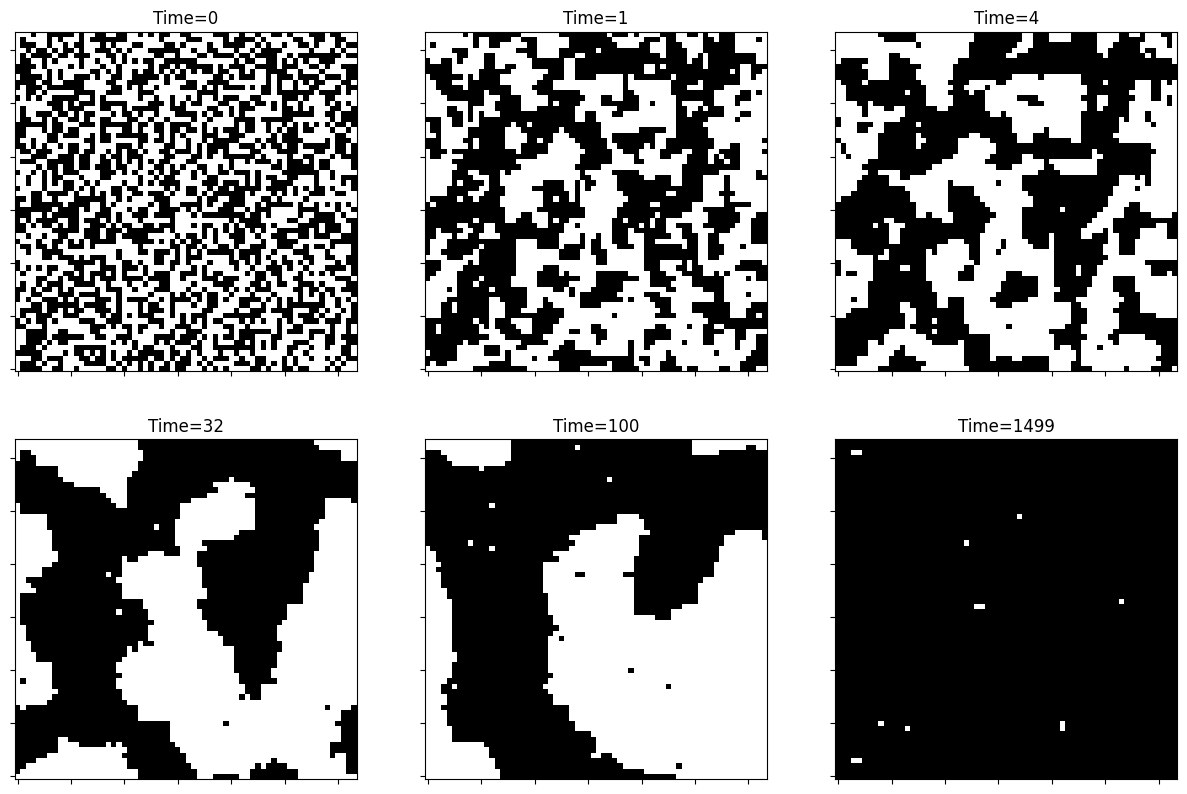

In [9]:
T = 1.3
lattice = 64
iterations = 1500
model = Ising(T, lattice, iterations, True)
model.simulate()